In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train= pd.read_csv('Train.csv')
df_test= pd.read_csv('Test.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_test.shape

(5681, 11)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [10]:
df_test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [11]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [13]:
df_train.duplicated().sum()

0

In [14]:
df_test.duplicated().sum()

0

In [15]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

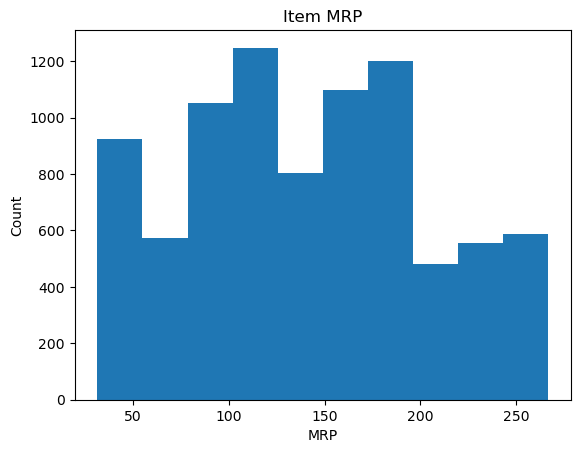

In [17]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df_train['Item_MRP'],bins = 10)
plt.title('Item MRP')
plt.xlabel('MRP')
plt.ylabel('Count')
plt.show()

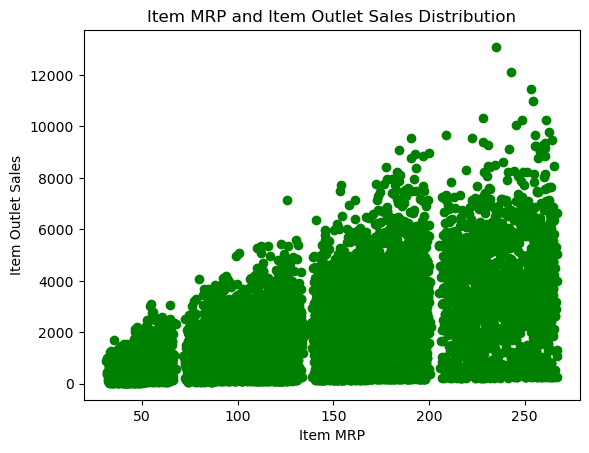

In [18]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_train['Item_MRP'],df_train['Item_Outlet_Sales'],color='green')
plt.title('Item MRP and Item Outlet Sales Distribution')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

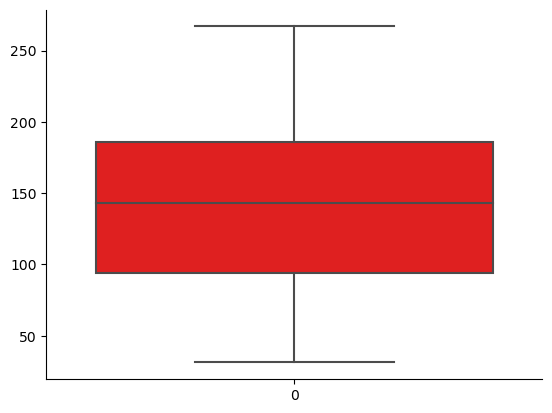

In [19]:
sns.boxplot(df_train['Item_MRP'],color='red') 
sns.despine()

In [20]:
test= df_train.groupby(['Outlet_Size','Outlet_Location_Type'])
test.size()

Outlet_Size  Outlet_Location_Type
High         Tier 3                   932
Medium       Tier 1                   930
             Tier 3                  1863
Small        Tier 1                  1458
             Tier 2                   930
dtype: int64

In [21]:
test= df_train.groupby(['Item_Type'])
test.describe()

Item_Weight                                        \
                            count       mean       std    min       25%   
Item_Type                                                                 
Baking Goods                536.0  12.277108  4.773622  4.880   8.23500   
Breads                      204.0  11.346936  4.440540  4.635   7.12875   
Breakfast                    89.0  12.768202  5.038131  6.425   8.06000   
Canned                      539.0  12.305705  4.586564  4.615   8.11500   
Dairy                       566.0  13.426069  4.686532  4.805   9.27750   
Frozen Foods                718.0  12.867061  4.507383  4.555   8.93500   
Fruits and Vegetables      1019.0  13.224769  4.575275  5.460   9.19500   
Hard Drinks                 183.0  11.400328  4.239144  4.610   8.26000   
Health and Hygiene          430.0  13.142314  4.512313  5.175   9.69500   
Household                   759.0  13.384736  4.998845  5.030   8.69500   
Meat                        337.0  12.817344  4.670812  5.150   9.30000   
Others                      137.0  13.853285  4.225534  5.500  10.65000   
Seafood                      51.0  12.552843  5.473830  5.365   7.42000   
Snack Foods                 988.0  12.987880  4.531256  5.095   9.19500   
Soft Drinks                 374.0  11.847460  4.403699  4.590   8.26000   
Starchy Foods               130.0  13.690731  4.010061  6.695  11.50000   

                                            Item_Visibility            ...  \
                          50%    75%    max           count      mean  ...   
Item_Type                                                              ...   
Baking Goods           11.650  15.75  20.85           648.0  0.069169  ...   
Breads                 10.600  14.85  20.85           251.0  0.066255  ...   
Breakfast              10.695  17.25  21.10           110.0  0.085723  ...   
Canned                 12.150  16.25  21.35           649.0  0.068129  ...   
Dairy                  13.350  17.60  20.70           682.0  0.072427  ...   
Frozen Foods           12.850  17.00  20.85           856.0  0.065645  ...   
Fruits and Vegetables  13.100  17.10  21.35          1232.0  0.068513  ...   
Hard Drinks            10.100  14.85  19.70           214.0  0.064943  ...   
Health and Hygiene     12.150  17.60  21.25           520.0  0.055216  ...   
Household              13.150  18.35  21.25           910.0  0.061322  ...   
Meat                   12.350  17.20  21.25           425.0  0.062284  ...   
Others                 14.500  17.75  20.50           169.0  0.060241  ...   
Seafood                11.650  17.75  20.75            64.0  0.074976  ...   
Snack Foods            13.150  16.85  21.25          1200.0  0.066850  ...   
Soft Drinks            11.800  15.35  20.75           445.0  0.063972  ...   
Starchy Foods          13.175  16.70  21.20           148.0  0.067564  ...   

                      Outlet_Establishment_Year         Item_Outlet_Sales  \
                                            75%     max             count   
Item_Type                                                                   
Baking Goods                             2004.0  2009.0             648.0   
Breads                                   2004.0  2009.0             251.0   
Breakfast                                2004.0  2009.0             110.0   
Canned                                   2004.0  2009.0             649.0   
Dairy                                    2004.0  2009.0             682.0   
Frozen Foods                             2004.0  2009.0             856.0   
Fruits and Vegetables                    2004.0  2009.0            1232.0   
Hard Drinks                              2004.0  2009.0             214.0   
Health and Hygiene                       2004.0  2009.0             520.0   
Household                                2004.0  2009.0             910.0   
Meat                                     2004.0  2009.0             425.0   
Others                             

In [22]:
# Filling the missing values with mean()

df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)  
df_test['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [23]:
#Filling the missing values with mode()

df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [24]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
df_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [26]:
# Dropping 'Item_Identifier' and 'Outlet_Identifier'

df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [27]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [28]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.857645,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600000,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300000,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


In [29]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])
print(df_train)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 1         0.016047          4  249.8092   
1           5.920                 2         0.019278         14   48.2692   
2          17.500                 1         0.016760         10  141.6180   
3          19.200                 2         0.000000          6  182.0950   
4           8.930                 1         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 1         0.056783         13  214.5218   
8519        8.380                 2         0.046982          0  108.1570   
8520       10.600                 1         0.035186          8   85.1224   
8521        7.210                 2         0.145221         13  103.1332   
8522       14.800                 1         0.044878         14   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0    

In [30]:

df_test['Item_Fat_Content']= le.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type']= le.fit_transform(df_test['Item_Type'])
df_test['Outlet_Size']= le.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type']= le.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type']= le.fit_transform(df_test['Outlet_Type'])
print(df_test)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0       20.750000                 1         0.007565         13  107.8622   
1        8.300000                 4         0.038428          4   87.3198   
2       14.600000                 1         0.099575         11  241.7538   
3        7.315000                 1         0.015388         13  155.0340   
4       12.857645                 2         0.118599          4  234.2300   
...           ...               ...              ...        ...       ...   
5676    10.500000                 2         0.013496         13  141.3154   
5677     7.600000                 2         0.142991         15  169.1448   
5678    10.000000                 1         0.073529          8  118.7440   
5679    15.300000                 2         0.000000          3  214.6218   
5680     9.500000                 2         0.104720          3   79.7960   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0    

In [31]:
df_train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Establishment_Year,-0.008301,-0.000189,-0.074834,0.004970,0.005020,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.089216,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,-0.004214,-0.173468,0.003053,-0.001975,-0.122304,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.009800,-0.128625,0.017048,0.567574,-0.049135,-0.086182,0.089367,0.401522,1.000000


<Axes: >

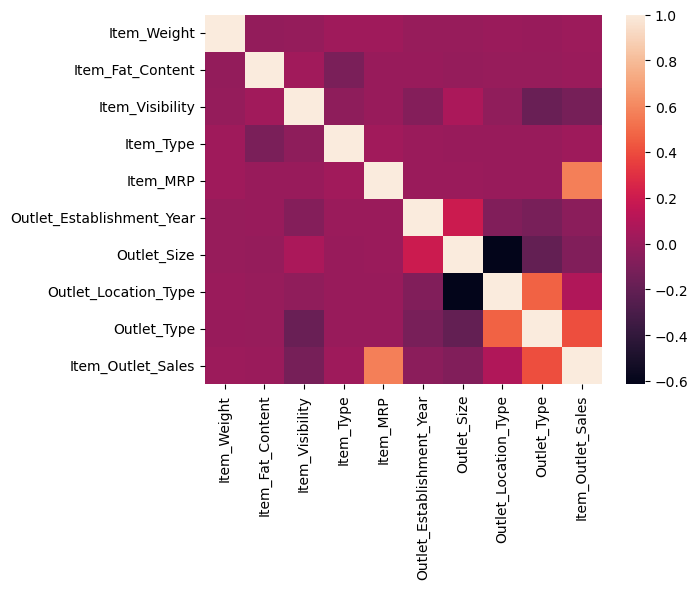

In [32]:
sns.heatmap(df_train.corr())

In [33]:
df_test.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.042494,-0.014752,0.029548,0.045420,0.003499,0.016806,-0.010017,0.010977
Item_Fat_Content,-0.042494,1.000000,0.033591,-0.128945,-0.014283,-0.010088,0.000421,-0.000130,0.000387
Item_Visibility,-0.014752,0.033591,1.000000,-0.036237,-0.014013,-0.097040,0.058082,-0.001146,-0.154042
Item_Type,0.029548,-0.128945,-0.036237,1.000000,0.060990,0.000204,-0.003729,0.000584,0.006179
Item_MRP,0.045420,-0.014283,-0.014013,0.060990,1.000000,-0.007233,-0.011717,0.001754,0.003326
Outlet_Establishment_Year,0.003499,-0.010088,-0.097040,0.000204,-0.007233,1.000000,0.193397,-0.089496,-0.122841
Outlet_Size,0.016806,0.000421,0.058082,-0.003729,-0.011717,0.193397,1.000000,-0.614284,-0.201538
Outlet_Location_Type,-0.010017,-0.000130,-0.001146,0.000584,0.001754,-0.089496,-0.614284,1.000000,0.467299
Outlet_Type,0.010977,0.000387,-0.154042,0.006179,0.003326,-0.122841,-0.201538,0.467299,1.000000


<Axes: >

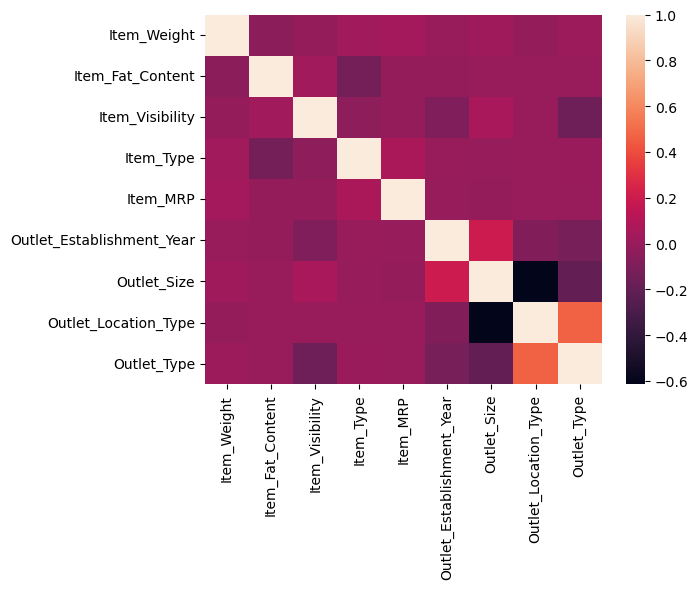

In [34]:
sns.heatmap(df_test.corr())

In [35]:
# Splitting Data Set

X=df_train.drop('Item_Outlet_Sales',axis=1)

In [36]:
Y=df_train['Item_Outlet_Sales']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [38]:
# Normalisation 

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [39]:
X_train_std= sc.fit_transform(X_train)

In [40]:
X_test_std= sc.transform(X_test)

In [41]:
X_train_std

array([[ 1.52290029, -0.57382672,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.57382672, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.97378032, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.57382672, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  0.97378032,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.57382672,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [42]:
X_test_std

array([[-0.43860915, -0.57382672, -0.21609255, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189, -0.57382672, -0.52943461, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775,  0.97378032,  0.16277342, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096, -0.57382672,  0.87824237, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [43]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [44]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

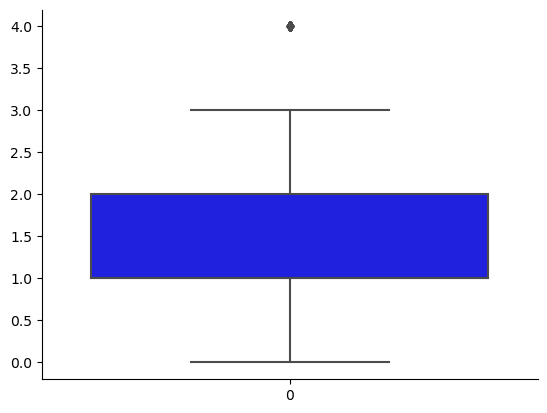

In [45]:
sns.boxplot(df_train['Item_Fat_Content'],color='b') 
sns.despine()

In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [47]:
low_fat_content,upp_fat_content=remove_outlier(df_train['Item_Fat_Content'])
df_train['Item_Fat_Content']=np.where(df_train['Item_Fat_Content']>upp_fat_content,upp_fat_content,df_train['Item_Fat_Content'])
df_train['Item_Fat_Content']=np.where(df_train['Item_Fat_Content']<low_fat_content,low_fat_content,df_train['Item_Fat_Content'])


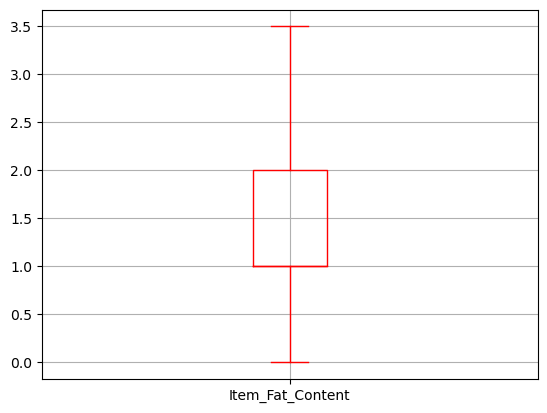

In [48]:
df_train.boxplot(column=['Item_Fat_Content'],color='r')
plt.show()

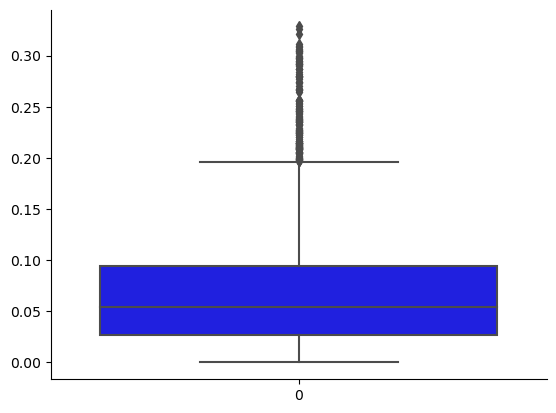

In [49]:
sns.boxplot(df_train['Item_Visibility'],color='b') 
sns.despine()

In [50]:
low_fat_content,upp_fat_content=remove_outlier(df_train['Item_Visibility'])
df_train['Item_Visibility']=np.where(df_train['Item_Visibility']>upp_fat_content,upp_fat_content,df_train['Item_Visibility'])
df_train['Item_Visibility']=np.where(df_train['Item_Visibility']<low_fat_content,low_fat_content,df_train['Item_Visibility'])


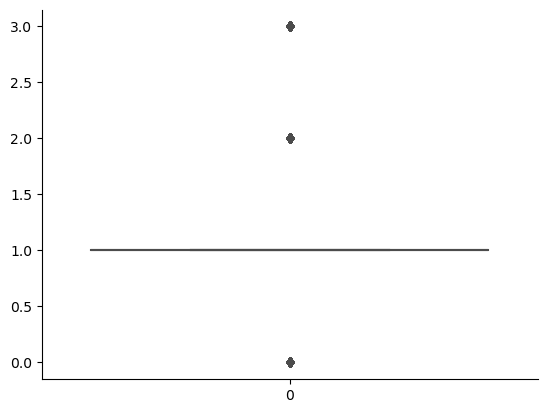

In [51]:
sns.boxplot(df_train['Outlet_Type'],color='b') 
sns.despine()

In [52]:
low_fat_content,upp_fat_content=remove_outlier(df_train['Outlet_Type'])
df_train['Outlet_Type']=np.where(df_train['Outlet_Type']>upp_fat_content,upp_fat_content,df_train['Outlet_Type'])
df_train['Outlet_Type']=np.where(df_train['Outlet_Type']<low_fat_content,low_fat_content,df_train['Outlet_Type'])

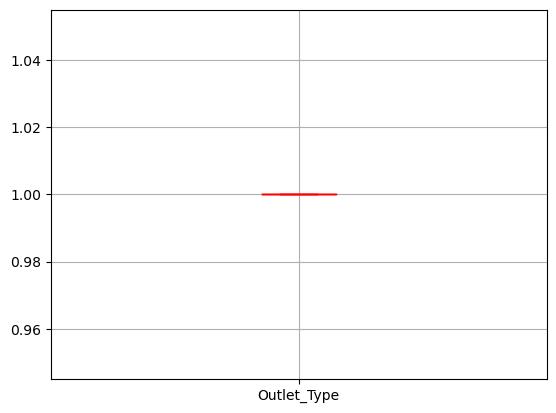

In [53]:
df_train.boxplot(column=['Outlet_Type'],color='r')
plt.show()

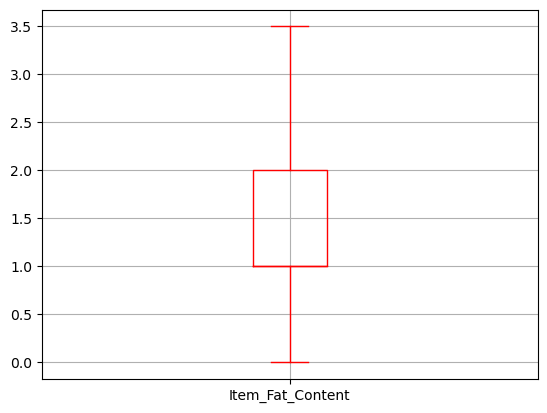

In [54]:
low_fat_content,upp_fat_content=remove_outlier(df_test['Item_Fat_Content'])
df_test['Item_Fat_Content']=np.where(df_test['Item_Fat_Content']>upp_fat_content,upp_fat_content,df_test['Item_Fat_Content'])
df_test['Item_Fat_Content']=np.where(df_test['Item_Fat_Content']<low_fat_content,low_fat_content,df_test['Item_Fat_Content'])
df_test.boxplot(column=['Item_Fat_Content'],color='r')
plt.show()


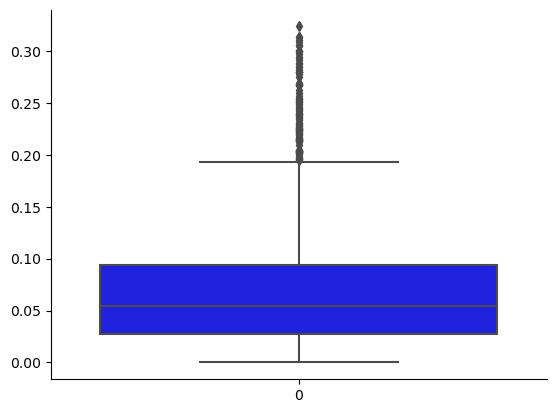

In [55]:
sns.boxplot(df_test['Item_Visibility'],color='b')
sns.despine()

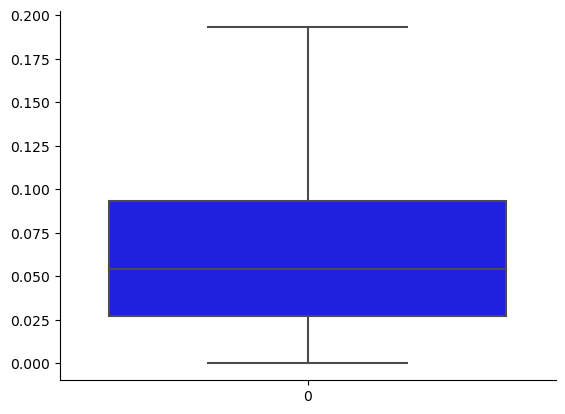

In [56]:
low_fat_content,upp_fat_content=remove_outlier(df_test['Item_Visibility'])
df_test['Item_Visibility']=np.where(df_test['Item_Visibility']>upp_fat_content,upp_fat_content,df_test['Item_Visibility'])
df_test['Item_Visibility']=np.where(df_test['Item_Visibility']<low_fat_content,low_fat_content,df_test['Item_Visibility'])
sns.boxplot(df_test['Item_Visibility'],color='b')
sns.despine()

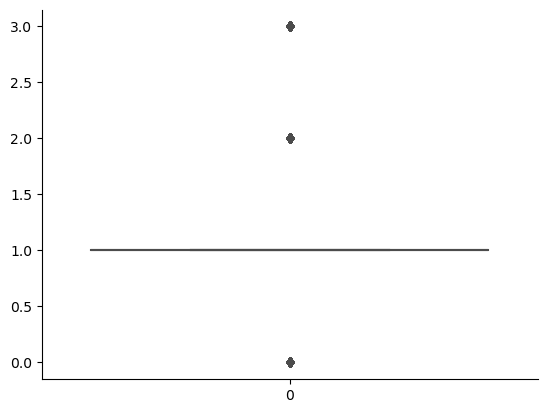

In [57]:
sns.boxplot(df_test['Outlet_Type'],color='b')
sns.despine()

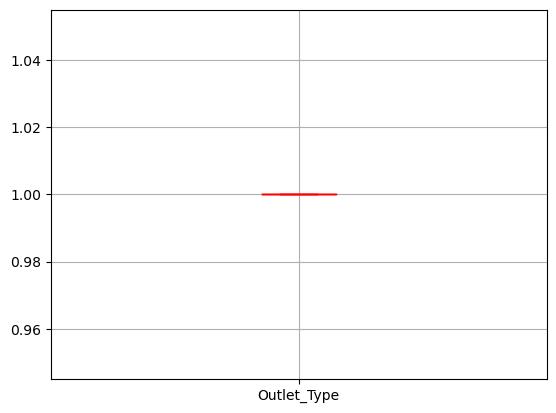

In [58]:
low_fat_content,upp_fat_content=remove_outlier(df_test['Outlet_Type'])
df_test['Outlet_Type']=np.where(df_test['Outlet_Type']>upp_fat_content,upp_fat_content,df_test['Outlet_Type'])
df_test['Outlet_Type']=np.where(df_test['Outlet_Type']<low_fat_content,low_fat_content,df_test['Outlet_Type'])
df_test.boxplot(column=['Outlet_Type'],color='r')
plt.show()

In [59]:
df_train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.018020,-0.011928,0.028015,0.024756,-0.008301,-0.007225,0.004088,NaN,0.011550
Item_Fat_Content,-0.018020,1.000000,0.038272,-0.119718,-0.000079,-0.002198,-0.011618,-0.004016,NaN,0.011634
Item_Visibility,-0.011928,0.038272,1.000000,-0.036213,-0.001163,-0.064105,0.061625,-0.023894,NaN,-0.117918
Item_Type,0.028015,-0.119718,-0.036213,1.000000,0.032651,0.004970,-0.001859,0.003084,NaN,0.017048
Item_MRP,0.024756,-0.000079,-0.001163,0.032651,1.000000,0.005020,0.006059,0.000232,NaN,0.567574
Outlet_Establishment_Year,-0.008301,-0.002198,-0.064105,0.004970,0.005020,1.000000,0.193389,-0.089216,NaN,-0.049135
Outlet_Size,-0.007225,-0.011618,0.061625,-0.001859,0.006059,0.193389,1.000000,-0.614311,NaN,-0.086182
Outlet_Location_Type,0.004088,-0.004016,-0.023894,0.003084,0.000232,-0.089216,-0.614311,1.000000,NaN,0.089367
Outlet_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Outlet_Sales,0.011550,0.011634,-0.117918,0.017048,0.567574,-0.049135,-0.086182,0.089367,NaN,1.000000


In [60]:
a=df_train.head(200)
print(a)

     Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0       9.300000               1.0         0.016047          4  249.8092   
1       5.920000               2.0         0.019278         14   48.2692   
2      17.500000               1.0         0.016760         10  141.6180   
3      19.200000               2.0         0.000000          6  182.0950   
4       8.930000               1.0         0.000000          9   53.8614   
..           ...               ...              ...        ...       ...   
195    10.500000               1.0         0.041395          6   37.6164   
196    19.000000               2.0         0.097313          5   48.0718   
197    14.600000               1.0         0.059583         11  238.8538   
198    12.857645               2.0         0.098664          4   62.9194   
199    12.857645               3.5         0.101339          3  232.6300   

     Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                 

In [61]:
#Line Plot

sns.set(rc={'figure.figsize':(7,7)})
sns.set(font_scale=1.5)

[Text(0.5, 0, 'index')]

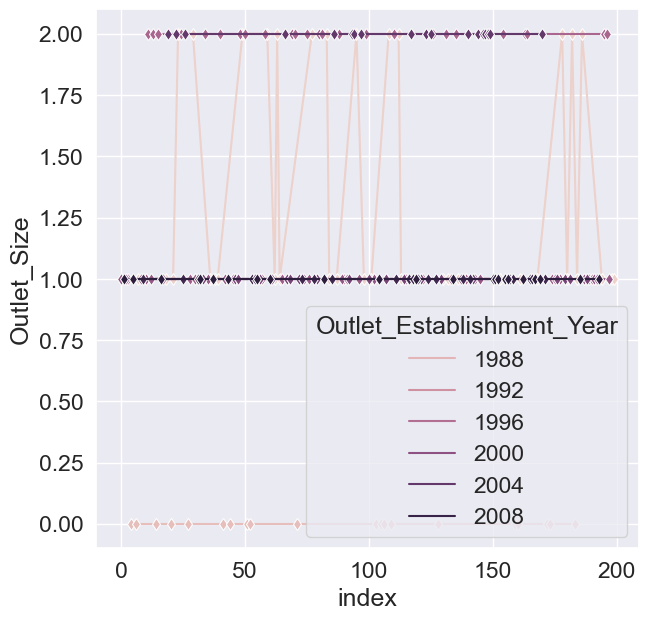

In [62]:
fig=sns.lineplot(x=a.index,y=a['Outlet_Size'],markevery=1,marker='d',data=a,hue=a['Outlet_Establishment_Year'])
fig.set(xlabel='index')

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

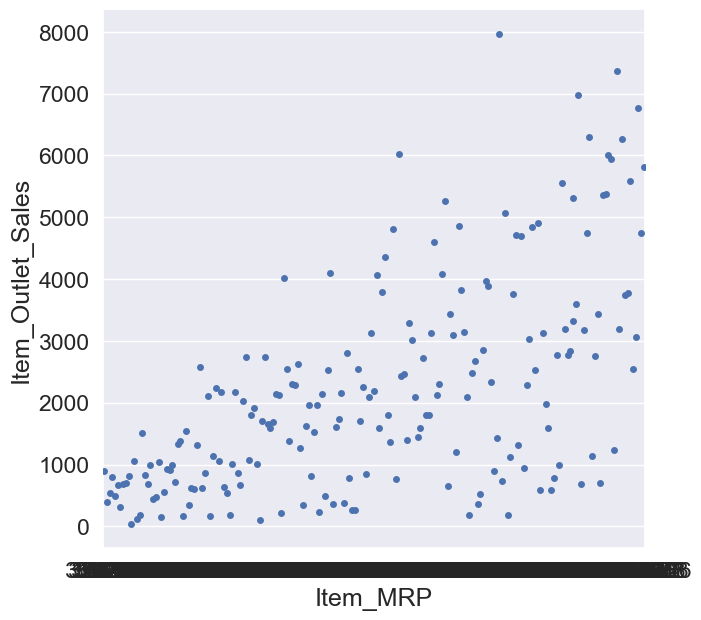

In [63]:
#Strip plot

sns.stripplot(x=a['Item_MRP'],y=a['Item_Outlet_Sales'])

<Axes: ylabel='Density'>

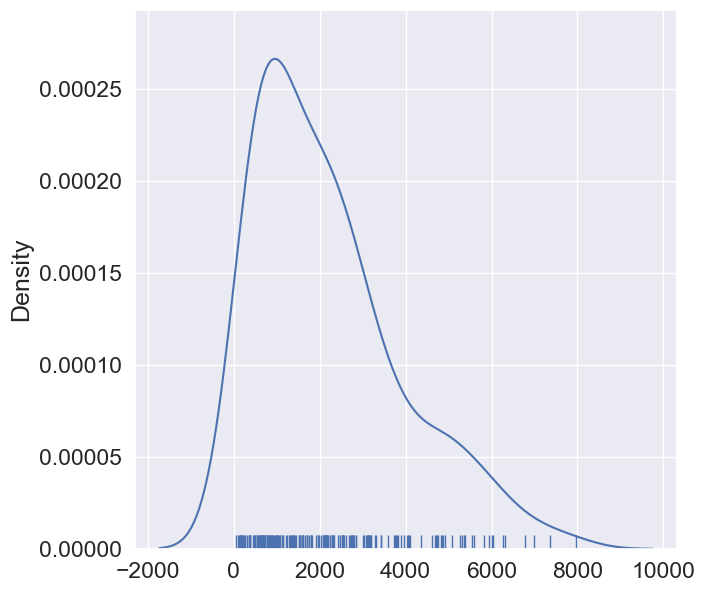

In [64]:
# Rug Plot

sns.distplot(x=a['Item_Outlet_Sales'],rug=True,hist=False)

<Axes: xlabel='Item_Type', ylabel='Density'>

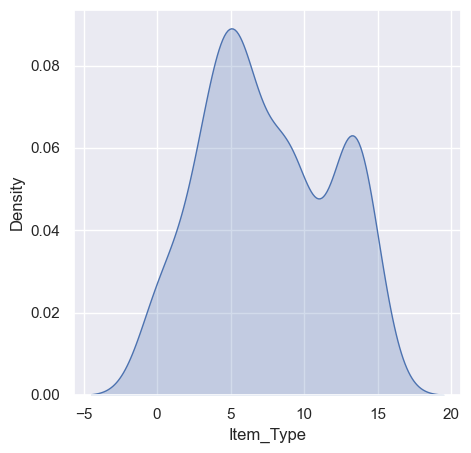

In [65]:
#Density Plot

sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(a['Item_Type'],shade=True)

<Axes: xlabel='Outlet_Size', ylabel='Density'>

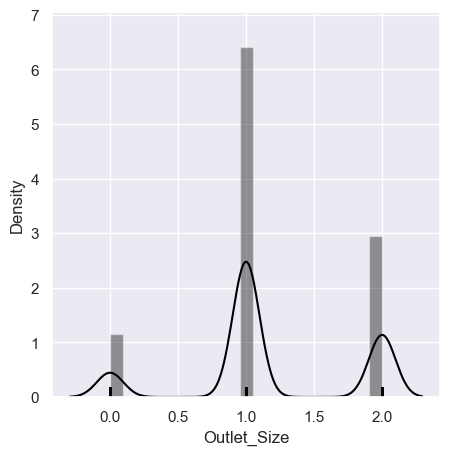

In [66]:
#Dist Plot

sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(df_train['Outlet_Size'],color='black',rug=True)

<Axes: >

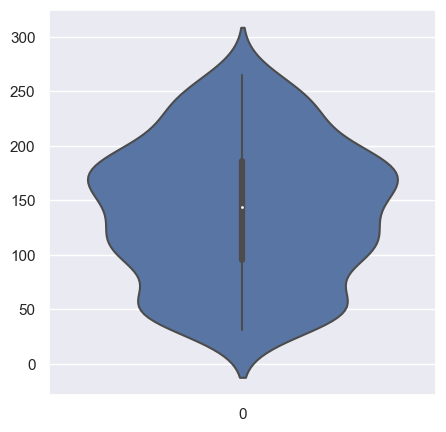

In [67]:
#Violin plot

sns.set(rc={'figure.figsize':(5,5)})
sns.violinplot(a['Item_MRP'],orient='vertical')

([<matplotlib.patches.Wedge at 0x2e8b6ba7ca0>,
 [Text(-0.4049370232742901, 1.0227541284110062, 'High'),
  Text(0.06906960848527893, -1.0978293989430645, 'Medium'),
  Text(1.0461621822461364, -0.3399186497354948, 'Small')])

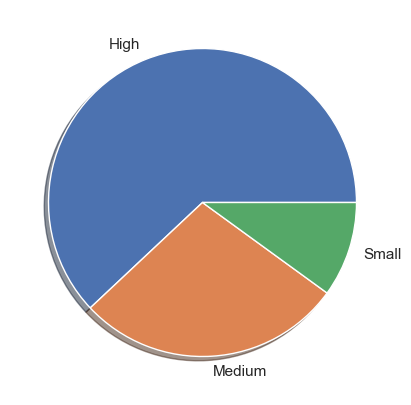

In [68]:
# Pie Chart 

plt.pie(a['Outlet_Size'].value_counts(),labels=['High','Medium','Small'],shadow=True)

In [69]:
# Model Creation

X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8179,11.00,1,0.055163,8,100.3358,2009,1,2,2
8355,18.00,1,0.038979,13,148.6418,1987,0,2,1
3411,7.72,2,0.074731,1,77.5986,1997,2,0,1
7089,20.70,1,0.049035,6,39.9506,2007,1,1,1
6954,7.55,1,0.027225,3,152.9340,2002,1,1,1


In [70]:
#Linear Regression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [71]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [72]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [73]:
Y_pred_lr=lr.predict(X_test_std)

In [74]:
r2_score(Y_test,Y_pred_lr)

0.5041875762809336

In [75]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041875762809336
880.9999067141264
1162.4412660891485


In [76]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [77]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor()

In [78]:
Y_pred_rf= rf.predict(X_test_std)

In [79]:
r2_score(Y_test,Y_pred_rf)

0.5417588509056316

In [80]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5417588509056316
786.09147617478
1117.5304335987328


In [81]:
#XGBoost Regression

from xgboost import XGBRegressor
xg= XGBRegressor()

In [82]:
xg.fit(X_train_std, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [83]:
Y_pred_xg= xg.predict(X_test_std)

In [84]:
r2_score(Y_test,Y_pred_xg)

0.5313160658956877

In [85]:
print(r2_score(Y_test,Y_pred_xg))
print(mean_absolute_error(Y_test,Y_pred_xg))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_xg)))

0.5313160658956877
800.4555146602086
1130.1923146392805


In [86]:
# Hyper parameter tuning

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)


grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.549 using {'n_estimators': 1000}
0.506 (0.012) with: {'n_estimators': 10}
0.546 (0.006) with: {'n_estimators': 100}
0.549 (0.006) with: {'n_estimators': 1000}


In [87]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [88]:
grid_search_forest.best_score_

0.5490364147022753

In [89]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [90]:
r2_score(Y_test,Y_pred_rf_grid)

0.5505251410737324